In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train[1234].shape

(28, 28)

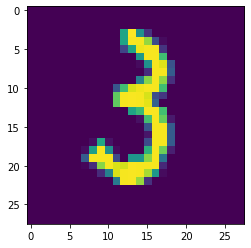

In [7]:
x_train[1234]
plt.imshow(x_train[1234], )

In [8]:
y_train[1234]

3

In [ ]:
# CNN 本身 Input 是矩陣
# CNN 要的格式 28*28 的一張 (28, 28, 1)
# 按照三張分色 或四張分色 就要有三張或四張()因為我們現在是灰階所以只要一張

In [9]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [10]:
# 因為希望數字不要是 3.7 8.2 因為結果間沒有連續關係
# one hot encoding


from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [11]:
y_train[1234]
# 就會在第四個值是 1 其他都是 0

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
# 壓縮 0-1 (原是 0-255)
# 數值大的容易成為關鍵
# 不是 0-1 不能用統計的理論

x_train = x_train/255
x_test = x_test/255

In [13]:
# 3 次 convolution 3 次 max-pooling
# 2 層 dense

# 輸出結果 0-9 有 10 個

# maxpooling 2*2

# convolution 1: filter(28*28)不算大， 4 個
# convolution 2: 8 個
# convolution 3: 16 個

# filter 大小可以取大概 3*3 大家喜歡奇數

# filter 應該要越來越多，因為基本原見的辨別應該沒有很多項、但是越高層開始從低層的結果組合，可以有更種搭配組合可能

# 第一層 17 個神經元 
# 

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD







In [17]:
model = Sequential()

In [18]:
# 4 個 filter 3*3的大小
# 加邊緣記分板同樣大小
# 第一層

model.add(Conv2D(4, (3, 3), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

In [19]:
model.add(MaxPool2D(pool_size=(2,2)))

In [20]:
# 第二層
model.add(Conv2D(8, (3, 3), padding='same',
                activation='relu'))

In [21]:
# 不一定每次都要 maxpooling
model.add(MaxPool2D(pool_size=(2,2)))

In [22]:
# 第三層
model.add(Conv2D(16, (3, 3), padding='same',
                activation='relu'))

In [23]:
model.add(MaxPool2D(pool_size=(2,2)))

In [24]:
# fully connected

# 前面是 keras 自己做的 他知道有幾個神經員輸入
model.add(Flatten())
model.add(Dense(9, activation='relu'))

In [25]:
model.add(Dense(33, activation='relu'))

In [26]:
# 結果輸出
model.add(Dense(10, activation='softmax'))

In [27]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [30]:
model.summary()
# 28*28 的圖 給 filter 3*3 用了 4 個 輸出的結果是 28*28 
# 每一個 FILTER 只有一個 bias
# 3*3*4 + 4 = 40
# 跟圖片大小沒關係
# 參數值不多

# 296
# 第一層後產生四張 28*28 的矩陣；所以有四層；要在乘上 4
# 3*3*8*4 + 8

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

In [35]:
model.fit(x_train, y_train, batch_size=70, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 24s 399us/step - loss: 0.0118 - acc: 0.9225
Epoch 2/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.0103 - acc: 0.9320
Epoch 3/20
60000/60000 [==============================] - 24s 405us/step - loss: 0.0092 - acc: 0.9397
Epoch 4/20
60000/60000 [==============================] - 24s 397us/step - loss: 0.0084 - acc: 0.9448
Epoch 5/20
60000/60000 [==============================] - 24s 406us/step - loss: 0.0078 - acc: 0.9489
Epoch 6/20
60000/60000 [==============================] - 25s 411us/step - loss: 0.0074 - acc: 0.9521
Epoch 7/20
60000/60000 [==============================] - 24s 401us/step - loss: 0.0070 - acc: 0.9544
Epoch 8/20
60000/60000 [==============================] - 24s 396us/step - loss: 0.0065 - acc: 0.95770s - loss: 0.0066 - acc: 0.
Epoch 9/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.0063 - acc: 0.9591
Epoch 10/20
60000/60000 [==============================

In [36]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 167us/step


In [37]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.00589
測試資料的正確率: 0.9606


In [38]:
model.save('myCNNModel.h5')

In [39]:
del model

In [40]:
from keras.models import load_model

In [41]:
model = load_model('myCNNmodel.h5')

In [42]:
predict = model.predict_classes(x_test)

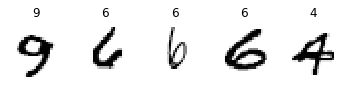

In [43]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")